In [46]:
import pandas as pd

titanic_data = pd.read_csv("titanic_dataset.csv")

In [47]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
titanic_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


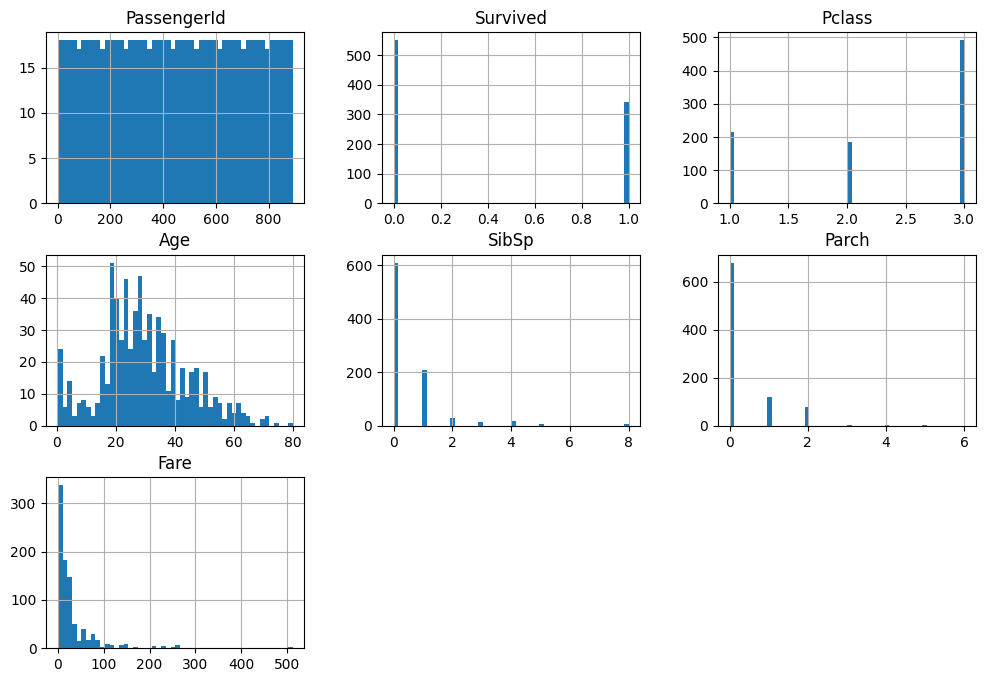

In [49]:
import matplotlib.pyplot as plt
titanic_data.hist(bins=50, figsize=(12, 8))
plt.show()



<Axes: xlabel='Age', ylabel='Count'>

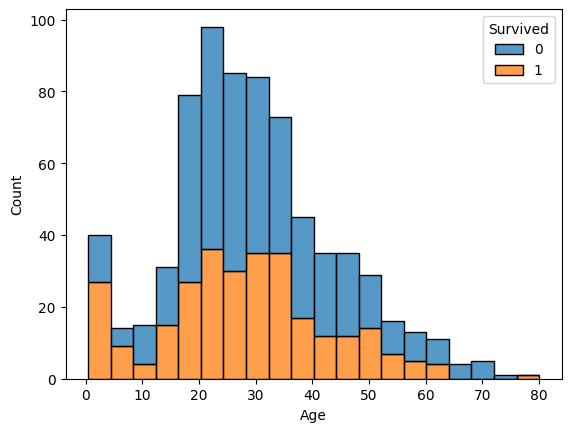

In [50]:
import seaborn as sns

sns.histplot(data=titanic_data, x="Age", hue="Survived", multiple="stack")

In [51]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_data, test_data = shuffle_and_split_data(titanic_data, 0.2)

print("train set size: ", len(train_data))
print("test set size: ", len(test_data))



train set size:  713
test set size:  178


In [52]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          558
Embarked         2
dtype: int64

In [53]:
train_data['Embarked'].value_counts()

Embarked
S    508
C    142
Q     61
Name: count, dtype: int64

In [54]:
train_data.loc[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [55]:
train_data['Embarked'].replace(np.nan, 'S', inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_44008\1511757928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Embarked'].replace(np.nan, 'S', inplace = True)


In [56]:
train_data.loc[(train_data['Age'].isnull()), '_Age'] = 'N'
train_data.loc[(train_data['Age']>=0)&(train_data['Age']<15), '_Age'] = 'A'
train_data.loc[(train_data['Age']>=15)&(train_data['Age']<35), '_Age'] = 'B'
train_data.loc[(train_data['Age']>=35)&(train_data['Age']<55), '_Age'] = 'C'
train_data.loc[(train_data['Age']>=55)&(train_data['Age']<65), '_Age'] = 'D'
train_data.loc[(train_data['Age']>=65), '_Age'] = 'B'

C:\Users\pc\AppData\Local\Temp\ipykernel_44008\1653381481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[(train_data['Age'].isnull()), '_Age'] = 'N'


In [57]:
train_data.drop(['PassengerId','Name','Cabin','Ticket','Age'],axis=1,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_44008\1229634439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['PassengerId','Name','Cabin','Ticket','Age'],axis=1,inplace=True)


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 757 to 725
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  713 non-null    int64  
 1   Pclass    713 non-null    int64  
 2   Sex       713 non-null    object 
 3   SibSp     713 non-null    int64  
 4   Parch     713 non-null    int64  
 5   Fare      713 non-null    float64
 6   Embarked  713 non-null    object 
 7   _Age      713 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 50.1+ KB


In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_cols=['Embarked']
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))

C:\Users\pc\AppData\Local\Temp\ipykernel_44008\361524945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[categorical_cols] = train_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))


In [60]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = train_data['Sex'].unique().tolist()
onehotencoder = OneHotEncoder(handle_unknown='ignore',dtype=int)

data_new = onehotencoder.fit_transform(train_data[['Sex']].values)

train_data = train_data.join(pd.DataFrame(data_new.toarray(),columns=categorical_cols))
train_data.drop(['Sex'],axis=1,inplace=True)

In [61]:
categorical_cols = train_data['_Age'].unique().tolist()

data_new = onehotencoder.fit_transform(train_data[['_Age']].values)

train_data = train_data.join(pd.DataFrame(data_new.toarray(),columns=categorical_cols))
train_data.drop(['_Age'],axis=1,inplace=True)

In [62]:
X_train.describe(include='all')

NameError: name 'X_train' is not defined

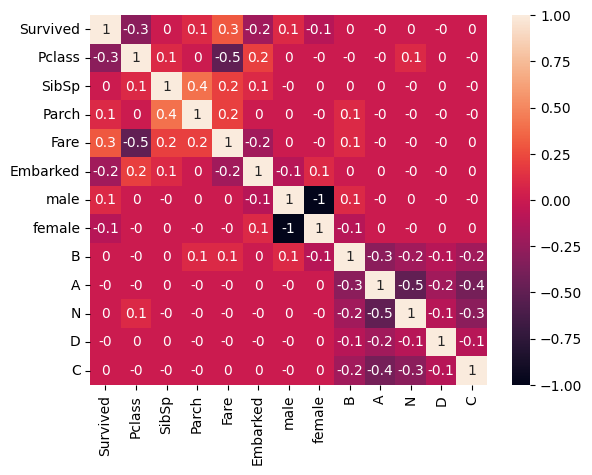

In [64]:
df=train_data
matrix = df.corr().round(1)
sns.heatmap(matrix, annot=True)
plt.show()

In [65]:
train_data.isnull().sum()

Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
Embarked      0
male        146
female      146
B           146
A           146
N           146
D           146
C           146
dtype: int64

In [72]:
train_data.notnull().sum()

Survived    713
Pclass      713
SibSp       713
Parch       713
Fare        713
Embarked    713
male        567
female      567
B           567
A           567
N           567
D           567
C           567
dtype: int64

In [67]:
y_train=train_data['Survived']
x_train=train_data[['Pclass','Embarked','Parch']]

from sklearn import preprocessing 
 
d = preprocessing.normalize(x_train) 
scaled_df = pd.DataFrame(d,columns=list(x_train.columns.values))
scaled_df.head()

,Pclass,Embarked,Parch
0,0.707107,0.707107,0.000000
1,0.727607,0.485071,0.485071
2,0.832050,0.554700,0.000000
3,0.832050,0.000000,0.554700
4,0.707107,0.707107,0.000000


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train,train_size=0.8,random_state=42,stratify=y_train)

In [71]:
from sklearn.svm import SVC
svc = SVC(decision_function_shape='ovo')
svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.3006993006993007
